# README

This notebook contains a short script used to visualise contact/reads
information for one or more samples.

### Purpose

* Read a CSV file (`all_samples_spot_infor.csv` in the `dir_path`)
    containing spot coordinates (`x`, `y`), the sample identifier
    and a column “Num of Reads”.
* For each sample of interest (`sampleid_list`) build a custom
    blue–red colormap with an alpha channel.
* Produce a scatter plot of the `x`,`y` points coloured by the
    read count, using a logarithmic normalisation.
* Save the figure to a PDF file (`Scatter_EndNum.<sample_id>.pdf`)
    with a horizontal colourbar appended.

The helper function `add_right_cax` is used to create the extra
axis for the colourbar.

### Usage

Run the cells in order. Modify `sampleid_list`, `dir_path` or the
thresholds/colourmap definitions as required to adapt to your data.

The plot files are written alongside the input data; the README
below is written to `README.md` when you execute the cell below.

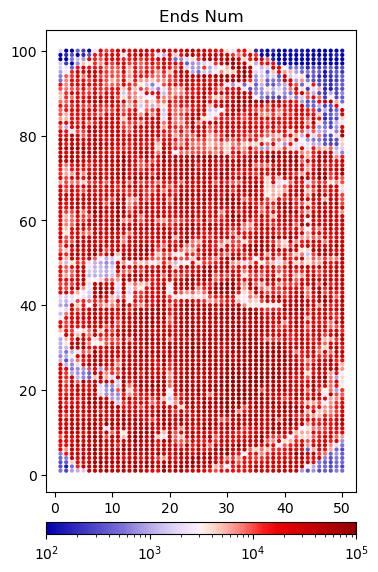

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
mpl.rcParams['pdf.fonttype'] = 42


def add_right_cax(ax, pad, width, orientation='vertical'):

    axpos = ax.get_position()
    if orientation == 'vertical':
        caxpos = mpl.transforms.Bbox.from_extents(
            axpos.x1 + pad,
            axpos.y0,
            axpos.x1 + pad + width,
            axpos.y1)
    elif orientation == 'horizontal':
        caxpos = mpl.transforms.Bbox.from_extents(
            axpos.x0,
            axpos.y0 - pad - width,
            axpos.x1,
            axpos.y0 - pad)
    else:
        raise ValueError('The Value of Param: orientation is Error')
    cax = ax.figure.add_axes(caxpos)
    return cax


sampleid_list = ['E13.5C1']
dir_path = '/home/xuyuetong/CRICK_Data_v3/Paper_Fig/Contact_Num/'
data_path = '{0}all_samples_spot_infor.csv'.format(dir_path)
data = pd.read_csv(data_path, header=0, index_col=0, sep=',')

for i, sample_id in enumerate(sampleid_list):

    threshold = 0.5
    cdict = {
        'red': (
            (0.0, 0.0, 0.0),
            (threshold, 1.0, 1.0),
            (0.7, 1.0, 1.0),
            (1.0, 0.6, 1.0),
        ),
        'green': (
            (0.0, 0.0, 0.0),
            (threshold, 0.9, 0.9),
            (0.7, 0.0, 0.0),
            (1.0, 0.0, 0.0),
        ),
        'blue': (
            (0.0, 0.0, 0.7),
            (threshold, 1.0, 0.8),
            (0.7, 0.0, 0.0),
            (1.0, 0.0, 0.0)
        ),
    }
    cdict = {
        **cdict,
        'alpha': (
            (0.0, 1.0, 1.0),
            (0.25, 1.0, 1.0),
            (threshold, 0.5, 0.5),
            (0.75, 1.0, 1.0),
            (1.0, 1.0, 1.0),
        )
    }
    # mpl.colormaps.register(LinearSegmentedColormap('BlueRed_{0}'.format(sample_id), cdict))
    blue_red = LinearSegmentedColormap('BlueRed_{0}'.format(sample_id), cdict)

    sample_data = data[data['sample'] == sample_id]
    plot_path = '{0}Scatter_EndNum.{1}.pdf'.format(dir_path, sample_id)              
    with PdfPages(plot_path) as pdf:
        fig = plt.figure(figsize=(4, 6))   
        ax = fig.add_subplot(111)
        cax = add_right_cax(ax, pad=0.05, width=0.02, orientation='horizontal')
        norm = mpl.colors.LogNorm(vmin=100, vmax=1e05)
        ax.scatter(sample_data['x'], sample_data['y'], c=sample_data['Num of Reads'], 
                s=4, norm=norm, cmap=blue_red)
        ax.set_title('Ends Num')
        im = mpl.cm.ScalarMappable(norm=norm, cmap=blue_red)
        cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
        pdf.savefig()
